<a href="https://colab.research.google.com/github/Bokyoung-00/retail_ramyun/blob/master/%EB%B8%94%EB%A1%9C%EA%B7%B8%20%EA%B2%8C%EC%8B%9C%EB%AC%BC%20%EC%88%98%20%EC%8B%9C%EA%B0%81%ED%99%94%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. 기본셋팅 및 함수 정의

#### 출시일전 2년과 출시후 6개월 바탕으로 크롤링한거 시각화입니다
- 크롤링 한 키워드는 csv파일명과 동일합니다

##### 갈릭버터 같은 경우에는 갈릭버터와 버터갈릭, 매운 같은 경우에는 매운, 얼큰, 건강은 건강과 건면 두 키워드를 포함해 크롤링
- 두 개 키워드 빈도수는 별도의 칼럼에 저장했습니다만 그래프를 그릴 때에는 sum으로 합쳐서 이용했습니다

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta
import time
from datetime import datetime, timedelta

In [ ]:
def handle(x):
    new_x = x.copy()
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])
    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()
    return final_x

In [ ]:
def draw_graph(x):
    new_x = x.copy()
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])

    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()

# 하나의 csv안에 두 개의 키워드를 입력한경우 len==3항목으로
    if len(final_x.columns) == 3:
        final_x.columns = ['date','frequency1','frequency2']
        final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
        plt.figure(figsize=(20,10))
        sns.set(style="whitegrid")
        sns.lineplot(x='date', y='sum',data=final_x);
        sns.barplot(x='date', y='sum',palette='ch:.25',data=final_x);
        plt.axvline(final_x.iloc[24,0], lw=6, color='g')

# 그렇지 않은 경우에는 else의 항목으로 그래프를 그렸심더
    else:
        final_x.columns = ['date','frequency']
        plt.figure(figsize=(20,10))
        sns.set(style="whitegrid")
        sns.lineplot(x='date', y='frequency',data=final_x);
        sns.barplot(x='date', y='frequency',palette='ch:.25',data=final_x);
        plt.axvline(final_x.iloc[24,0], lw=6, color='g')

In [ ]:
#변화율 구하는 함수 정의
def percentage_change(current, previous):
    if previous != 0 :
        return (float(current - previous) / abs(previous))*100
    else:
        return "undefined"

In [ ]:
#변화 배수 재는 함수 정의
def calculate_change(current, previous):
    if previous != 0 :
        return current/previous
    else:
        return "undefined"

In [ ]:
# 월별 변화율 그리는 함수인데 필요없으므로 기각
# def diff_graph(x):
#     new_x = x.copy()
#     del new_x['Unnamed: 0']
    
#     date_list = new_x['date']
#     new_list = []
#     for item in date_list:
#         itemstr = str(item)
#         new_list.append(itemstr[0:6])
#     new_x['date'] = new_list
    
#     graph_x = new_x.groupby(['date']).sum()
#     final_x = graph_x.reset_index()

#     if len(final_x.columns) == 3:
#         final_x.columns = ['date','frequency1','frequency2']
#         final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
#         ratio_list = [0]
#         for num in range(0,len(final_x)-1):
#             ratio_list.append(percentage_change(final_x.iloc[num+1,3],final_x.iloc[num,3]))
            
#     else:
#         final_x.columns = ['date','frequency']
#         ratio_list = [0]
#         for num in range(0,len(final_x)-1):
#             ratio_list.append(percentage_change(final_x.iloc[num+1,1],final_x.iloc[num,1]))
    
#     final_x['diff'] = ratio_list
#     plt.figure(figsize=(15,10))
#     sns.set(style="whitegrid")
#     sns.lineplot(x='date', y='diff',data=final_x);
#     sns.barplot(x='date', y='diff',palette='ch:.25',data=final_x);
#     plt.axvline(final_x.iloc[24,0], lw=6, color='g')

In [ ]:
# 일자별 빈도 데이터를 바탕으로 출시 2년전과 한달 전 게시글 빈도가 몇 배 상승했는지 보는 함수 EX. 100에서 200으로 증가했으면 함수결과가 2가 나옴
def find_out_change(x):
    new_x = x.copy()
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])
    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()

    if len(final_x.columns) == 3:
        final_x.columns = ['date','frequency1','frequency2']
        final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
        before = final_x.iloc[0,3]
        after = final_x.iloc[23,3]
        change = calculate_change(after,before)
            
    else:
        final_x.columns = ['date','frequency']
        before = final_x.iloc[0,1]
        after = final_x.iloc[23,1]
        change = calculate_change(after,before)

    return(change)

In [ ]:
#일자별 빈도 데이터를 바탕으로 출시 2년전과 한달 전 게시글 빈도 변화율을 보는 함수 EX.100에서 200으로 증가했으면 함수결과가 1이 나옴(100이 변화량이니깐)
def find_out_ratio(x):
    new_x = x.copy()
    del new_x['Unnamed: 0']
    
    date_list = new_x['date']
    new_list = []
    for item in date_list:
        itemstr = str(item)
        new_list.append(itemstr[0:6])
    new_x['date'] = new_list
    
    graph_x = new_x.groupby(['date']).sum()
    final_x = graph_x.reset_index()

    if len(final_x.columns) == 3:
        final_x.columns = ['date','frequency1','frequency2']
        final_x['sum'] = final_x['frequency1'] + final_x['frequency2']
        before = final_x.iloc[0,3]
        after = final_x.iloc[23,3]
        change = percentage_change(after,before)
            
    else:
        final_x.columns = ['date','frequency']
        before = final_x.iloc[0,1]
        after = final_x.iloc[23,1]
        change = percentage_change(after,before)
        
    return(change)

#### 파일 불러온 순서가 그래프 순서

In [ ]:
health = pd.read_csv('건강건면.csv')
spicy = pd.read_csv('매운얼큰.csv')
cream = pd.read_csv('크림.csv')
wasamayo = pd.read_csv('와사비마요.csv')
mara = pd.read_csv('마라.csv')
boodae = pd.read_csv('부대찌개.csv')
garlic = pd.read_csv('갈릭버터.csv') 
jjapa = pd.read_csv('짜파구리.csv')
vig = pd.read_csv('비건.csv')

## 1. 게시글 빈도수를 그린 단순 그래프
#### 초록색 선은 제품 출시일입니다
- 건강건면 = 신라면건면
- 매운얼큰 = 앵그리너구리
    + 출시일자가 2020년 5월이라 2020년 10월 데이터 부재
- 크림 = 크림까르보불닭
    + 출시일자가 2020년 9월이라 이후 데이터 없음
- 와사비마요 = 와사마요볶음면
- 마라 = 마라탕면
- 부대찌개 = 부대찌개라면
- 갈릭버터 = 갈릭버터볶음면
- 짜파구리 = 짜파구리
- 비건 = 채황라면

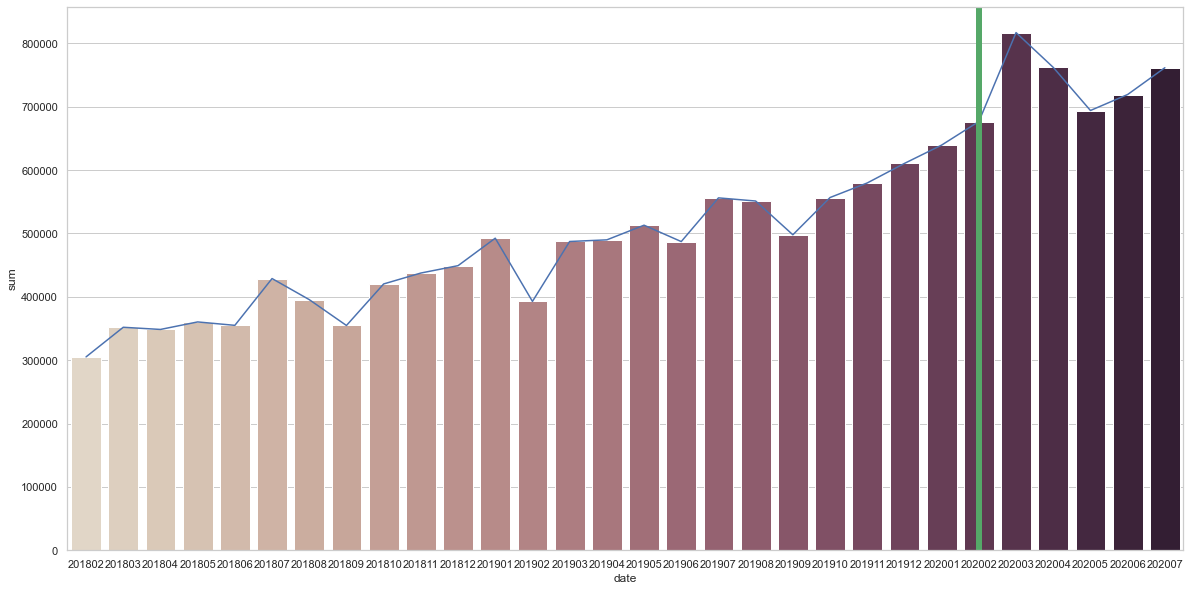

In [ ]:
draw_graph(health)

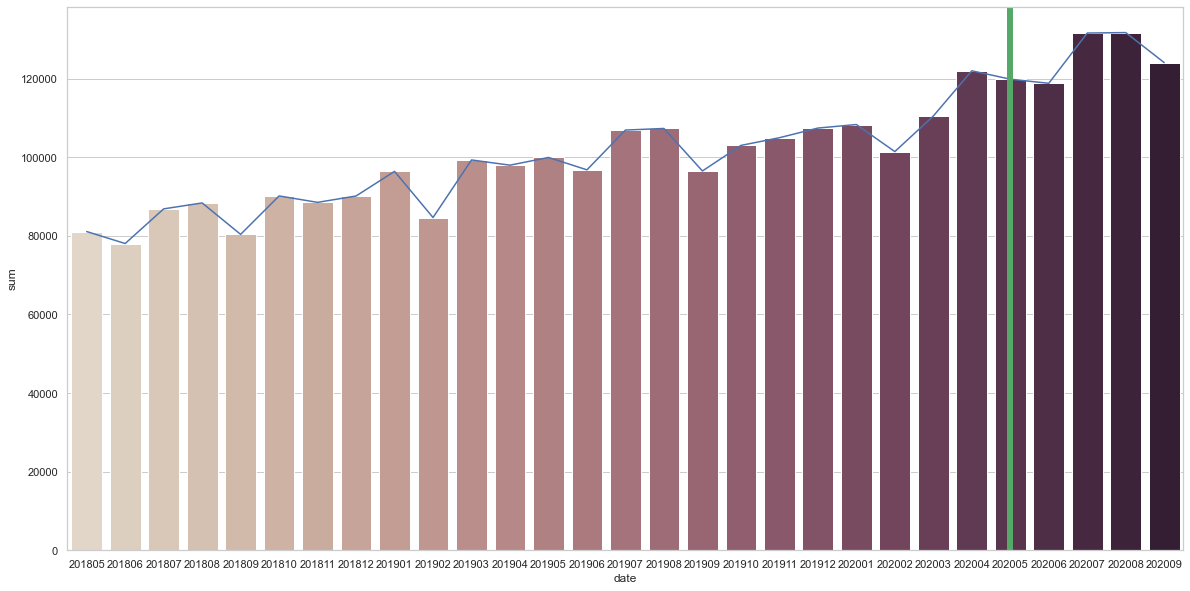

In [ ]:
draw_graph(spicy)

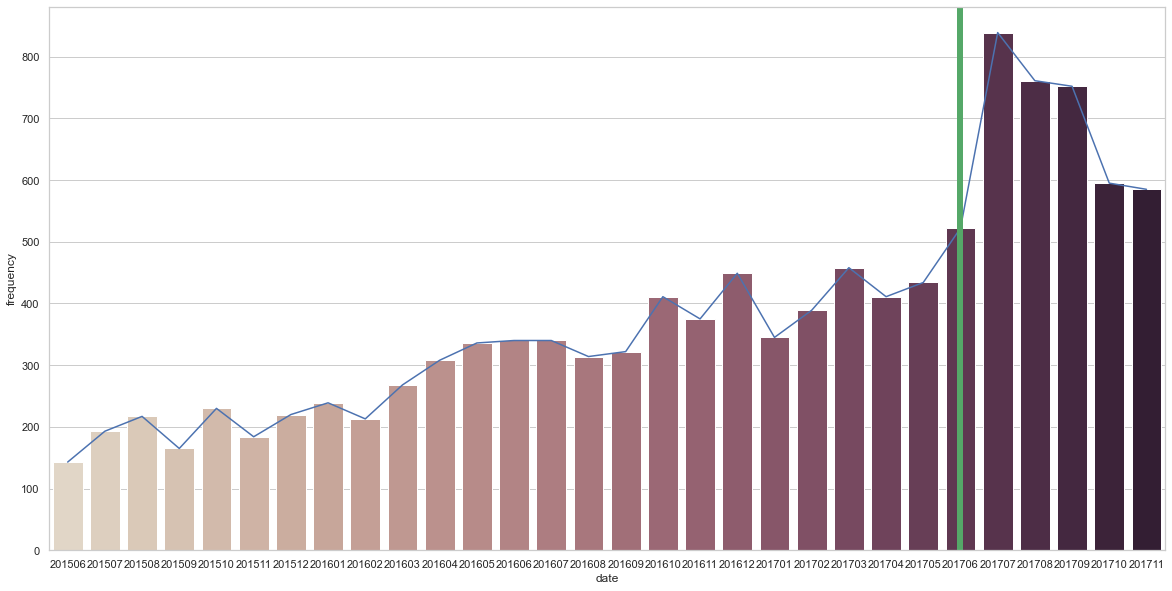

In [ ]:
draw_graph(wasamayo)

### 나머지는 여러분이 그래프를 그릴 수 있당 절대 귀않은거 아니당

## 2-1. 증가 배수를 나타내는 그래프_짜파구리 포함버전 
#### 각 항목을 하나의 그래프로 나타냄
- cf. 100에서 200으로 증가했을 경우, 2배 증가했으므로 2가 나오는 함수 사용

In [ ]:
#전체 키워드별 증가 배수를 change_list에 저장
dataframe_list = [health,spicy,cream,wasamayo,mara,boodae,garlic,jjapa,vig]
change_list = []
for item in dataframe_list:
    change_list.append(find_out_change(item))
print(change_list)

[2.095157262795011, 1.504347289880989, 1.7701451794918717, 3.034965034965035, 1.9249772461318424, 1.8745972738537795, 1.8090386624869383, 42.656716417910445, 5.494172494172494]


In [ ]:
#생성한 리스트를 바탕으로 데이터 프레임 생성
title_list = ['health','spicy','cream','wasamayo','mara','boodae','garlic','jjapa','vig']
change_frame = pd.DataFrame({'Title':title_list,'Change':change_list})
change_frame

,Title,Change
0,health,2.095157
1,spicy,1.504347
2,cream,1.770145
3,wasamayo,3.034965
4,mara,1.924977
5,boodae,1.874597
6,garlic,1.809039
7,jjapa,42.656716
8,vig,5.494172


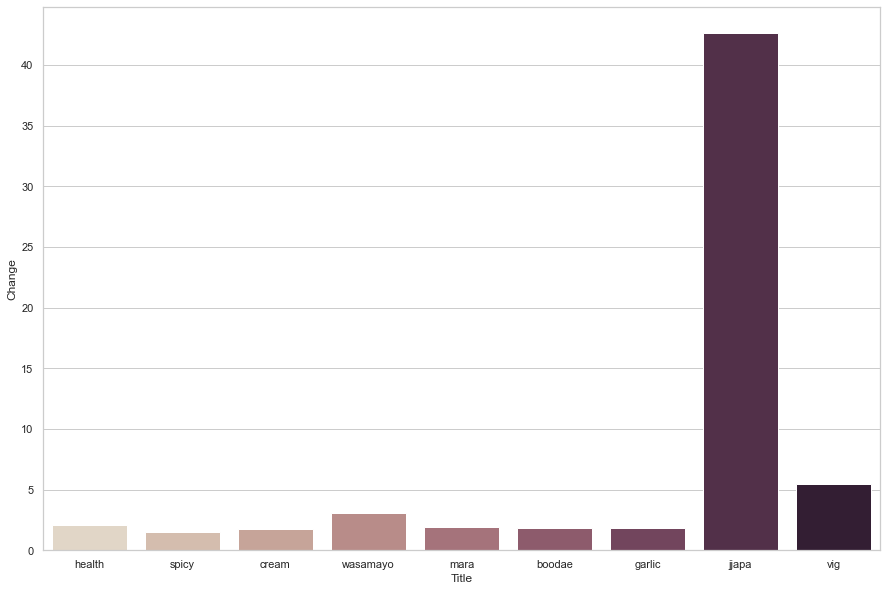

In [ ]:
#그래프 그리기
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='Title', y='Change',palette='ch:.25',data=change_frame);

## 2-2. 증가 배수를 나타내는 그래프_짜파구리 불포함버전 

In [ ]:
dataframe_list2 = [health,spicy,cream,wasamayo,mara,boodae,garlic,vig]
change_list2 = []
for item in dataframe_list2:
    change_list2.append(find_out_change(item))
print(change_list2)

[2.095157262795011, 1.504347289880989, 1.7701451794918717, 3.034965034965035, 1.9249772461318424, 1.8745972738537795, 1.8090386624869383, 5.494172494172494]


In [ ]:
title_list2 = ['health','spicy','cream','wasamayo','mara','boodae','garlic','vig']
change_frame2 = pd.DataFrame({'Title':title_list2,'Change':change_list2})
change_frame2

,Title,Change
0,health,2.095157
1,spicy,1.504347
2,cream,1.770145
3,wasamayo,3.034965
4,mara,1.924977
5,boodae,1.874597
6,garlic,1.809039
7,vig,5.494172


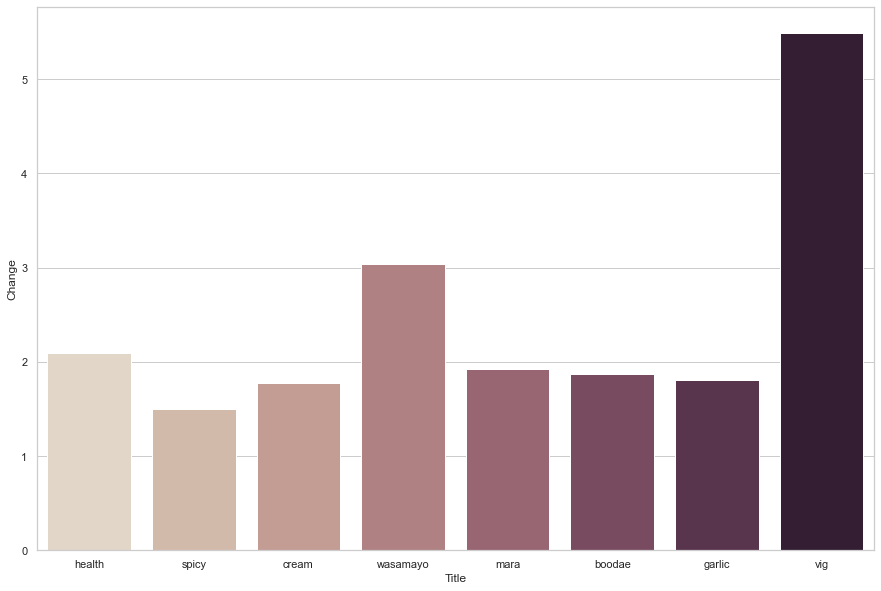

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='Title', y='Change',palette='ch:.25',data=change_frame2);

## 3-1.증가비율을 나타내는 그래프_짜파구리 포함버전
#### 각 항목을 하나의 그래프로 나타냄
- cf. 100에서 200으로 증가했을 경우, 2배 증가했으므로 1이 나오는 함수 사용

In [ ]:
#전체 키워드별 증가율을 change_list에 저장
dataframe_list = [health,spicy,cream,wasamayo,mara,boodae,garlic,jjapa,vig]
ratio_list = []
for item in dataframe_list:
    ratio_list.append(find_out_ratio(item))
print(ratio_list)

[109.51572627950111, 50.43472898809891, 77.01451794918718, 203.4965034965035, 92.49772461318425, 87.45972738537795, 80.90386624869383, 4165.671641791045, 449.41724941724937]


In [ ]:
title_list = ['health','spicy','cream','wasamayo','mara','boodae','garlic','jjapa','vig']
ratio_frame = pd.DataFrame({'Title':title_list,'Ratio':ratio_list})
ratio_frame

,Title,Ratio
0,health,109.515726
1,spicy,50.434729
2,cream,77.014518
3,wasamayo,203.496503
4,mara,92.497725
5,boodae,87.459727
6,garlic,80.903866
7,jjapa,4165.671642
8,vig,449.417249


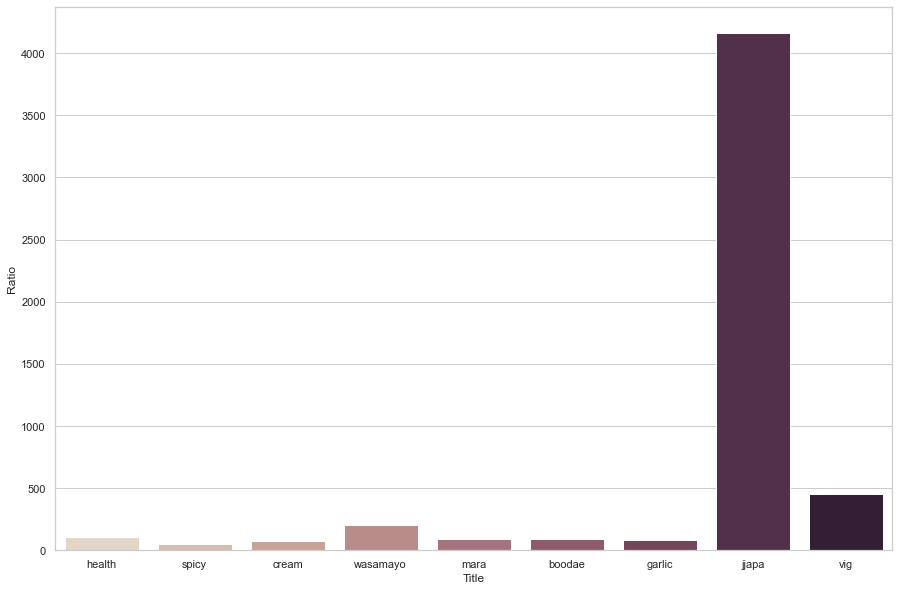

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='Title', y='Ratio',palette='ch:.25',data=ratio_frame);

## 3-2.증가비율을 나타내는 그래프_짜파구리 불포함버전

In [ ]:
dataframe_list2 = [health,spicy,cream,wasamayo,mara,boodae,garlic,vig]
ratio_list2 = []
for item in dataframe_list2:
    ratio_list2.append(find_out_ratio(item))
print(ratio_list2)

[109.51572627950111, 50.43472898809891, 77.01451794918718, 203.4965034965035, 92.49772461318425, 87.45972738537795, 80.90386624869383, 449.41724941724937]


In [ ]:
title_list2 = ['health','spicy','cream','wasamayo','mara','boodae','garlic','vig']
ratio_frame2 = pd.DataFrame({'Title':title_list2,'Ratio':ratio_list2})
ratio_frame2

,Title,Ratio
0,health,109.515726
1,spicy,50.434729
2,cream,77.014518
3,wasamayo,203.496503
4,mara,92.497725
5,boodae,87.459727
6,garlic,80.903866
7,vig,449.417249


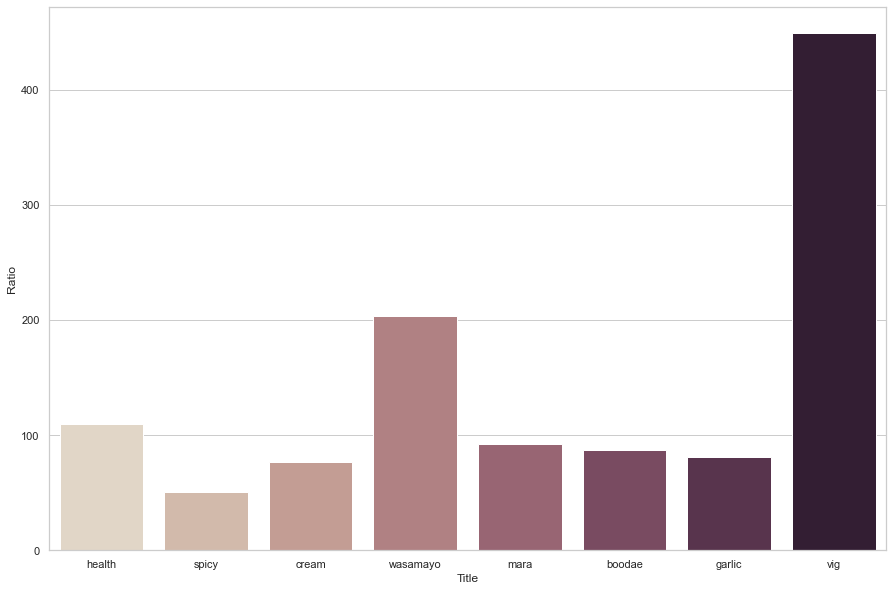

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.barplot(x='Title', y='Ratio',palette='ch:.25',data=ratio_frame2);